In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models

# Data Preparation
train_file_path = '/content/drive/MyDrive/data/sign_mnist_train/sign_mnist_train.csv'
train_data = pd.read_csv(train_file_path)
test_file_path = '/content/drive/MyDrive/data/sign_mnist_test/sign_mnist_test.csv'
test_data = pd.read_csv(test_file_path)

# Extracting image data and labels
X_train = np.array(train_data.iloc[:, 1:])
y_train = np.array(train_data.iloc[:, 0])

X_test = np.array(test_data.iloc[:, 1:])
y_test = np.array(test_data.iloc[:, 0])

# Normalizing the image data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshaping the image data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Model Building
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes for letters A-Z in sign language
])

# Model Training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

# Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Saving the model
model.save('sign_language_model.h5')


Epoch 1/5
275/275 [==============================] - 33s 117ms/step - loss: 1.7385 - accuracy: 0.4787 - val_loss: 1.0561 - val_accuracy: 0.6305
Epoch 2/5
275/275 [==============================] - 26s 96ms/step - loss: 0.4066 - accuracy: 0.8714 - val_loss: 0.5265 - val_accuracy: 0.8426
Epoch 3/5
275/275 [==============================] - 27s 99ms/step - loss: 0.1296 - accuracy: 0.9677 - val_loss: 0.4215 - val_accuracy: 0.8723
Epoch 4/5
275/275 [==============================] - 25s 92ms/step - loss: 0.0401 - accuracy: 0.9953 - val_loss: 0.4730 - val_accuracy: 0.8749
Epoch 5/5
225/225 [==============================] - 2s 9ms/step - loss: 0.4672 - accuracy: 0.8855
Test Accuracy: 0.8855270743370056


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


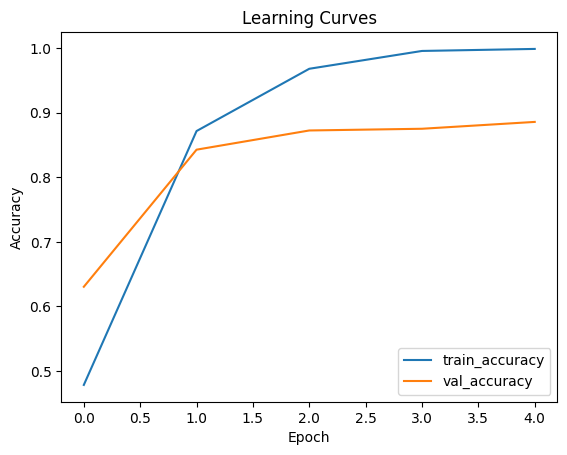

225/225 [==============================] - 2s 9ms/step


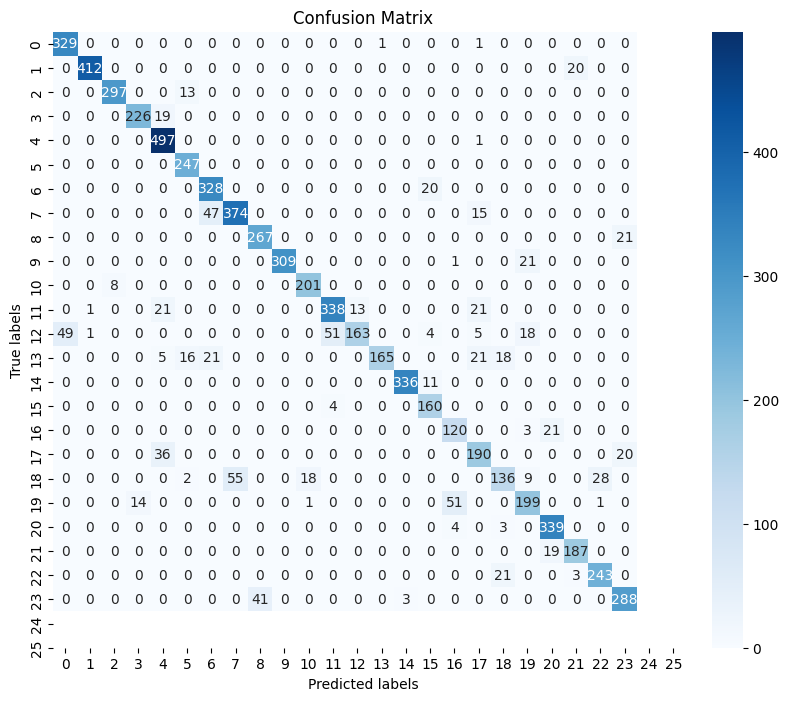

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot learning curves
def plot_learning_curves(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curves(history)

# Generate confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = np.argmax(model.predict(X_test), axis=-1)
labels = [str(i) for i in range(26)]
plot_confusion_matrix(y_test, y_pred, labels)